In [36]:
import numpy as np
from matplotlib import pyplot as plt
import re

In [37]:
data = {
    './slurm-8342983.out': {'label': 'No modifications'},
    './slurm-8342984.out': {'label': 'SwiGLU'},
    './slurm-8342985.out': {'label': 'RoPE'},
    './slurm-8342986.out': {'label': 'Linear LR'},
    './slurm-8342987.out': {'label': 'Cosine LR'},
    './slurm-8342988.out': {'label': 'RMSNorm'},
    './slurm-8342988.out': {'label': 'All modifications'}
}

In [38]:
for slurm_path in data.keys():
    iter_loss_pattern = re.compile(
        r'^iter_dt (\d+\.\d+)ms; iter (\d+): train loss (\d+\.\d+)$'
    )
    data[slurm_path]['train_loss'] = []

    times = []
    with open(slurm_path, 'r') as f:
        for line in f:
            match = iter_loss_pattern.search(line)
            if match is None:
                continue
            data[slurm_path]['train_loss'].append((int(match.group(2)), float(match.group(3))))
            times.append(float(match.group(1)))
    
    data[slurm_path]['train_loss'] = np.array(data[slurm_path]['train_loss'])
    data[slurm_path]['seconds'] = np.sum(times) / 1000

/tmp/ipykernel_2873547/2832882068.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


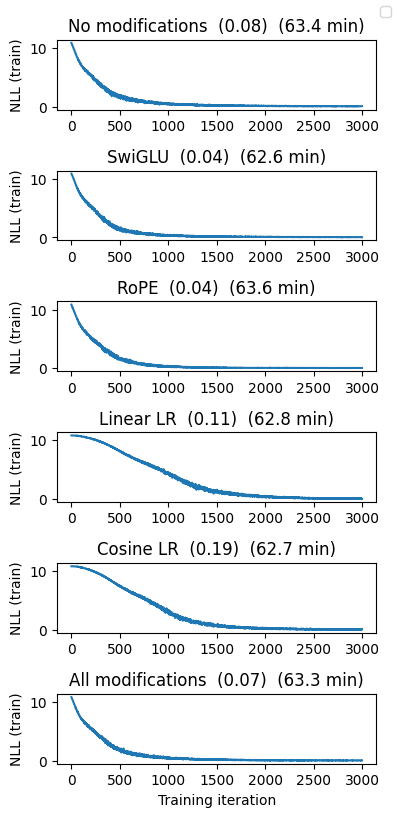

In [ ]:
fig, axes = plt.subplots(len(data), figsize=(4, 8))

for (slurm_path, slurm_data), ax in zip(data.items(), axes):
    ax.plot(slurm_data['train_loss'][:, 0], slurm_data['train_loss'][:, 1])
    ax.set_title(f"{slurm_data['label']}  ({slurm_data['train_loss'][-1, 1]:.2f})  ({(slurm_data['seconds'] / 60):.1f} min)")
    ax.set_ylabel('NLL (train)')
fig.legend()
fig.tight_layout()

axes[-1].set_xlabel('Training iteration')
plt.savefig('separate.svg')
plt.show()

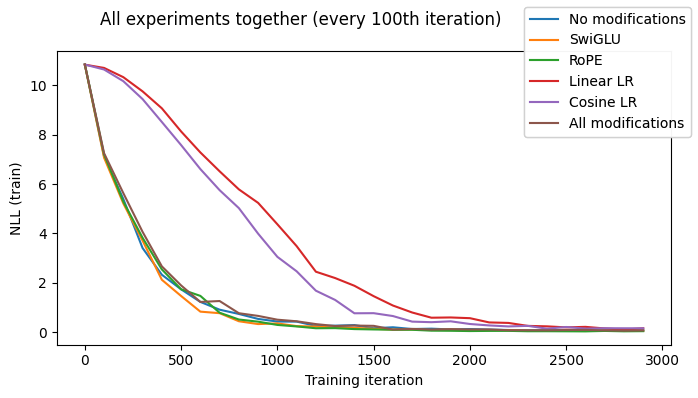

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

for slurm_path, slurm_data in data.items():
    ax.plot(slurm_data['train_loss'][::100, 0], slurm_data['train_loss'][::100, 1], label=slurm_data['label'], lw=1.5)
    ax.set_ylabel('NLL (train)')
fig.legend()
fig.tight_layout()

fig.legend()
fig.suptitle('All experiments together (every 100th iteration)                 ')
ax.set_xlabel('Training iteration')
fig.tight_layout()
plt.savefig('all_together.svg')
plt.show()